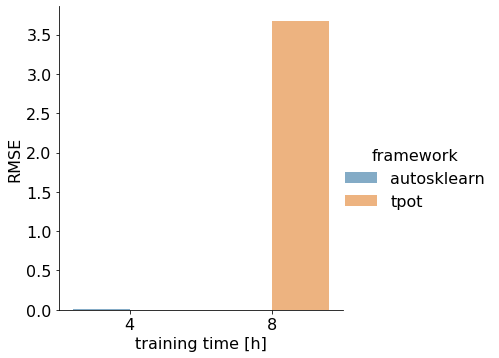

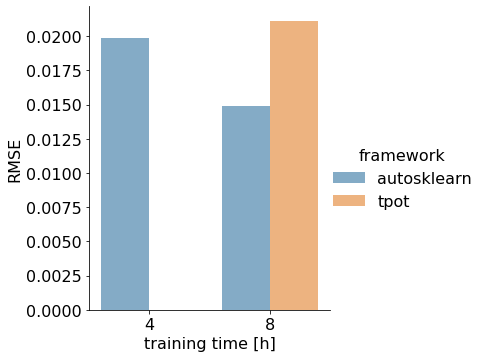

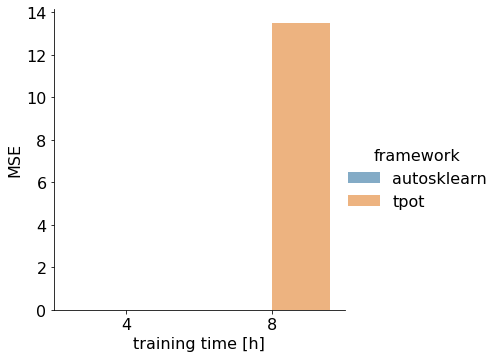

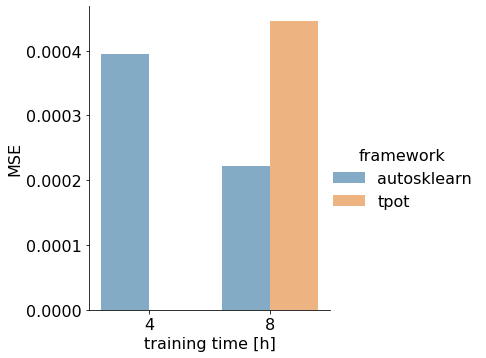

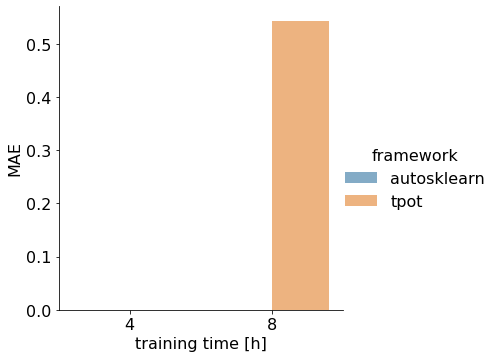

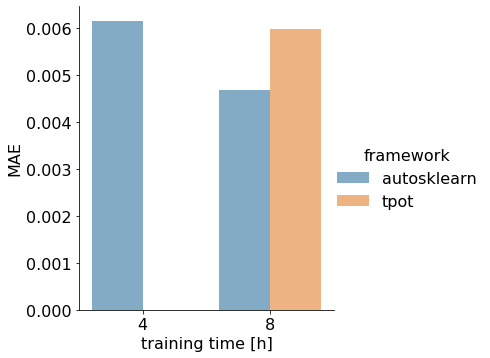

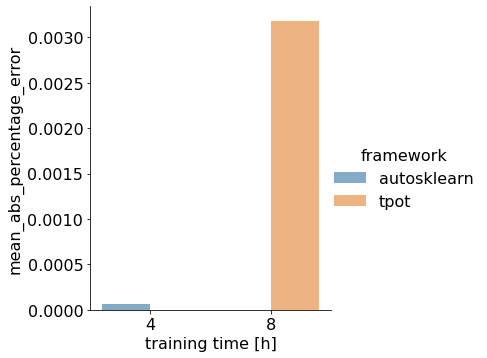

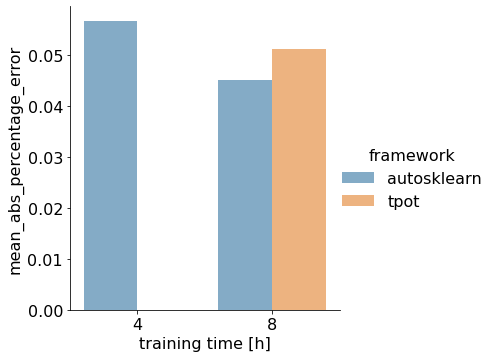

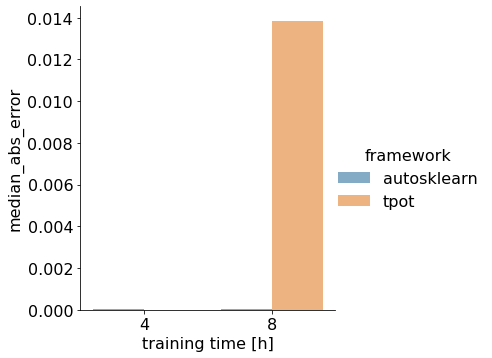

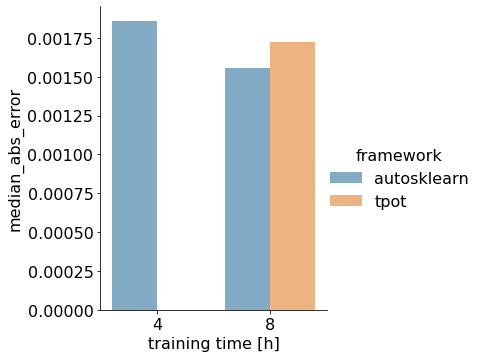

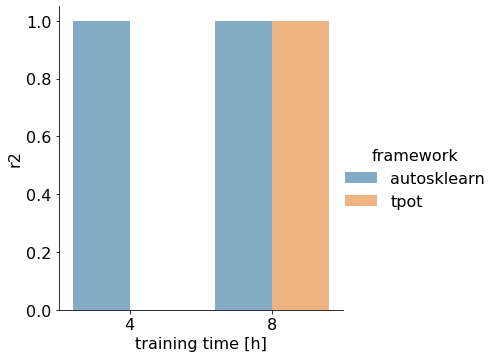

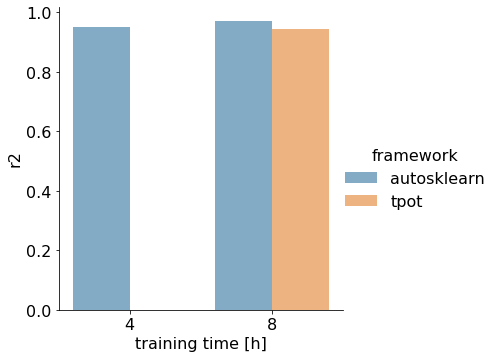

In [49]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns


sample_filepath = os.path.join("/home/niels/Downloads/automl/training_times_on_yahoo_geni_5s")
sample_files = [y for x in os.walk(sample_filepath) for y in glob(os.path.join(x[0], '*_scores.csv'))]
sample_files = [ file for file in sample_files if not file.__contains__("combined_scores.csv") ]
header = 'framework,training_time,target_metric,RMSE,MSE,MAE,mean_abs_percentage_error,median_abs_error,r2,pipeline\n'

samples = pd.DataFrame()

for filename in sample_files:
    path = os.path.join(sample_filepath, filename)
    if os.path.isfile(path):
        #print("processing ", path)
        with open(path) as f:
            df = pd.read_csv(f, sep=",", header=0)
            samples = samples.append(df)

#print("all samples: ", samples)
samples.to_csv(sample_filepath + '/combined_scores.csv', index=False, sep=',')
targets = ["eventRateOut", "processingLatencyMean"]
#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

for loss in ["RMSE", "MSE", "MAE", "mean_abs_percentage_error", "median_abs_error", "r2"]:
    for i in range(0, len(targets)):
        with sns.plotting_context({"font.size": 16.0}):
            target_samples = samples[ samples["target_metric"] == targets[i] ]

            #for framework in ["auto-sklearn", "tpot", "h2o"]:
                #model_samples = target_samples[ (target_samples.framework == framework) ]
                #axes[i].plot(model_samples["training_time"], model_samples["RMSE"], label=framework)
            c = sns.catplot(data=target_samples, kind="bar", x="training_time", y=loss, hue="framework", alpha=0.6)
            c.set_axis_labels("training time [h]", loss)
            c.savefig("automl_framework_training_time_vs_%s_%s.pdf" % (loss, targets[i]), dpi=500)
            #sns.lineplot('training_time', 'RMSE', hue='framework', data=target_samples, ax=axes[i], markers='o', label=framework, linewidth=3)
            #sns.lineplot(h_data.Time, h_data.OnlinePredictedLatency, ax=axes, color=palette[2], label="Online Prediction", linewidth=3, alpha=0.8)
            #sns.lineplot(h_data.Time, h_data.OfflinePredictedLatency, ax=axes, color=palette[1], label="Offline Prediction", linewidth=3, alpha=0.8)
            #axes[i].grid()
            #axes[i].set_ylim(0, 1)
            #axes[i].set_ylabel("RMSE")
            #axes[i].set_xlabel("training time [h]")
            #axes.legend(loc="center left", bbox_to_anchor=(1, 0.5))
            #fig.tight_layout()

    #fig.savefig("automl_framework_training_time_vs_rmse_%s.pdf" % targets[i], dpi=500)

